In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
iter_csv = pd.read_table('./data/mapaffil2016_3.tsv', sep='\t', encoding='latin-1',
                         dtype={'PMID': object, 
                                'au_order': np.int64,
                                'lastname': object,
                                'firstname': object,
                                'year': np.int64,
                                'type': object, 
                                'city': object, 
                                'state':object, 
                                'country': object,
                                'lat': np.float64, 
                                'lon': np.float64, 
                                'fips': object},
                         iterator=True, chunksize=10**6)
mapAffil = pd.concat([chunk[pd.notnull(chunk['fips'])] for chunk in iter_csv])

# mapAffil = pd.read_table('./data/mapaffil2015.tsv', sep='\t', encoding='latin-1',
#                          dtype={'PMID': np.int32, 'au_order': np.int32},
#                          nrows=10000)

In [3]:
mapAffil.dtypes

PMID          object
au_order       int64
lastname      object
firstname     object
year           int64
type          object
city          object
state         object
country       object
lat          float64
lon          float64
fips          object
dtype: object

In [10]:
mapAffil.reset_index(inplace=True)

In [15]:
mapAffil.head()

,PMID,au_order,year,type,city,state,country,lat,lon,fips
0,26151952,1,2016,EDU,"Tucson, AZ, USA",AZ,USA,32.222,-110.970,04019
1,26151951,1,2016,EDU,"Los Angeles, CA, USA",CA,USA,34.053,-118.245,06037
2,26151950,1,2016,EDU,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061
3,26151925,3,2015,EDU-HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025
4,26151913,8,2015,ORG,"San Francisco, CA, USA",CA,USA,37.779,-122.420,06075


### write to CSV or read no null CSV

In [18]:
mapAffil.to_csv('./data/mapAffil_2016_nonull.tsv', sep='\t')
#mapAffil = pd.read_table('./data/mapAffil_2016_nonull.tsv', sep='\t', encoding='latin-1')

In [14]:
##drop stuff as necessary
#mapAffil = mapAffil.drop(['Unnamed: 0','index'], 1)
mapAffil = mapAffil.drop(['index', 'lastname', 'firstname'], 1)

In [17]:
mapAffil.shape

(12191076, 10)

In [15]:
mapAffil[mapAffil['state'] == 'PR'] 

,PMID,au_order,year,type,city,state,country,lat,lon,fips
274,26151650,5,2015,EDU,"Carolina, PR, USA",PR,USA,18.443,-66.023,72031
912,26150827,1,2015,EDU,"San Juan, PR, USA",PR,USA,18.466,-66.118,72127
913,26150827,2,2015,EDU,"San Juan, PR, USA",PR,USA,18.466,-66.118,72127
914,26150827,3,2015,EDU,"San Juan, PR, USA",PR,USA,18.466,-66.118,72127
915,26150827,4,2015,EDU,"San Juan, PR, USA",PR,USA,18.466,-66.118,72127
5850,26146483,1970,2015,EDU,"Mayaguez, PR, USA",PR,USA,18.201,-67.140,72097
5851,26146483,1971,2015,EDU,"Mayaguez, PR, USA",PR,USA,18.201,-67.140,72097
5852,26146483,1972,2015,EDU,"Mayaguez, PR, USA",PR,USA,18.201,-67.140,72097
6404,26145813,1,2015,EDU,"Mayaguez, PR, USA",PR,USA,18.201,-67.140,72097
6405,26145813,2,2015,EDU,"Mayaguez, PR, USA",PR,USA,18.201,-67.140,72097


In [8]:
mapAffil.head()

,PMID,au_order,year,affiliation,type,city,state,country,lat,lon,fips
0,26151952,1,2016,"Department of Pharmacology and Toxicology, Col...",EDU,"Tucson, AZ, USA",AZ,USA,32.222,-110.970,4019
1,26151951,1,2016,"Department of Epidemiology, University of Cali...",EDU,"Los Angeles, CA, USA",CA,USA,34.053,-118.245,6037
2,26151950,1,2016,"Department of Preventive Medicine, Icahn Schoo...",EDU,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061
3,26151925,3,2015,"Center for Pain and the Brain, Department of A...",EDU-HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025
4,26151913,8,2015,"Gladstone Institute of Cardiovascular Disease,...",ORG,"San Francisco, CA, USA",CA,USA,37.779,-122.420,6075


In [7]:
au_by_pmid = mapAffil.groupby('PMID').count()['au_order']

In [8]:
au_by_pmid.head()

PMID
32     5
34     2
47     1
132    2
169    3
Name: au_order, dtype: int64

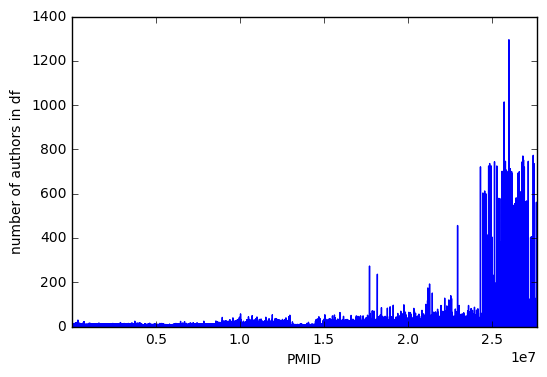

In [9]:
au_by_pmid.plot()
plt.ylabel('number of authors in df')
plt.show()

In [10]:
count_PMID_by_fips = mapAffil.groupby('fips').PMID.nunique()

In [13]:
count_PMID_by_fips.head()

fips
1001     3
1003    46
1015    89
1017     3
1021     1
Name: PMID, dtype: int64

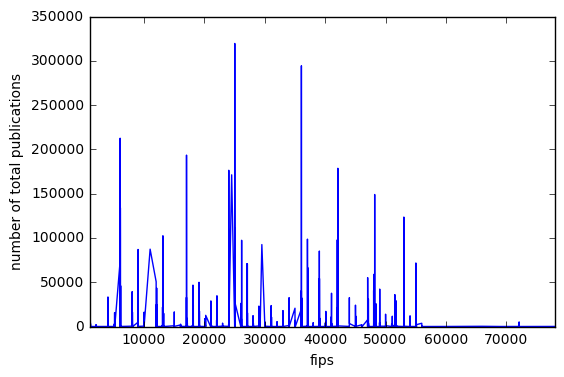

In [14]:
count_PMID_by_fips.plot()
plt.ylabel('number of total publications')
plt.show()

In [11]:
PMID_count = pd.DataFrame(count_PMID_by_fips)
PMID_count = PMID_count.reset_index()

In [12]:
PMID_count.columns = ['fips', 'total_fips_PMID_count']
PMID_count.head()

,fips,total_fips_PMID_count
0,1001,3
1,1003,46
2,1015,89
3,1017,3
4,1021,1


In [13]:
author_count = pd.DataFrame(au_by_pmid)
author_count = author_count.reset_index()

In [14]:
author_count.columns = ['PMID', 'au_count_by_PMID']
author_count.head()

,PMID,au_count_by_PMID
0,32,5
1,34,2
2,47,1
3,132,2
4,169,3


In [15]:
mapAffil = pd.merge(mapAffil, PMID_count, on='fips', how='left')
mapAffil = pd.merge(mapAffil, author_count, on='PMID', how='left')

In [20]:
mapAffil.head()

,PMID,au_order,year,affiliation,type,city,state,country,lat,lon,fips,total_fips_PMID_count,au_count_by_PMID
0,26151952,1,2016,"Department of Pharmacology and Toxicology, Col...",EDU,"Tucson, AZ, USA",AZ,USA,32.222,-110.970,4019,33342,1
1,26151951,1,2016,"Department of Epidemiology, University of Cali...",EDU,"Los Angeles, CA, USA",CA,USA,34.053,-118.245,6037,212560,1
2,26151950,1,2016,"Department of Preventive Medicine, Icahn Schoo...",EDU,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061,294341,1
3,26151925,3,2015,"Center for Pain and the Brain, Department of A...",EDU-HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,1
4,26151913,8,2015,"Gladstone Institute of Cardiovascular Disease,...",ORG,"San Francisco, CA, USA",CA,USA,37.779,-122.420,6075,112848,1


In [29]:
print('max number of unique PMIDs per county=',mapAffil['total_fips_PMID_count'].max())
print('max number of author contributions per PMID=',mapAffil['au_count_by_PMID'].max())

max number of unique PMIDs per county= 319560
max number of author contributions per PMID= 1295


### Boston (fips 319560) has highest amount of publications (644899) 

In [30]:
mapAffil[mapAffil['total_fips_PMID_count'] == mapAffil['total_fips_PMID_count'].max()]

,PMID,au_order,year,affiliation,type,city,state,country,lat,lon,fips,total_fips_PMID_count,au_count_by_PMID
3,26151925,3,2015,"Center for Pain and the Brain, Department of A...",EDU-HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,1
37,26151888,6,2015,"Department of Radiology, Brigham and Women's H...",EDU-HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,4
38,26151888,7,2015,"Department of Surgery, Division of Plastic Sur...",EDU-HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,4
39,26151888,8,2015,"Department of Surgery, Division of Plastic Sur...",EDU-HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,4
40,26151888,10,2015,"Department of Surgery, Division of Plastic Sur...",EDU-HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,4
107,26151821,29,2015,"Division of Gastroenterology, Massachusetts Ge...",HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,75
108,26151821,30,2015,"Harvard Medical School, Boston, Massachusetts ...",EDU,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,75
112,26151821,34,2015,Program in Genetic Epidemiology and Statistica...,EDU,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,75
120,26151821,44,2015,"Harvard School of Public Health, Boston, Massa...",EDU,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,75
125,26151821,49,2015,"Department of Nutrition, Harvard School of Pub...",EDU,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,75


#### 2042 unique fips codes

In [31]:
len(mapAffil.fips.unique())

2042

#### FIPS sorted by descending PMID_count

In [19]:
fips_total_publications = mapAffil[['city', 
                                 'state', 
                                 'country', 
                                 'lat', 
                                 'lon', 
                                 'fips', 
                                 'total_fips_PMID_count'
                                ]].drop_duplicates(subset=['fips',
                                                           'total_fips_PMID_count'
                                                          ]).sort_values(by='total_fips_PMID_count', ascending=False)
fips_total_publications.reset_index(inplace=True)
fips_total_publications.head(15)

,index,city,state,country,lat,lon,fips,total_fips_PMID_count
0,3,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560
1,2,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061,294341
2,1,"Los Angeles, CA, USA",CA,USA,34.053,-118.245,6037,212560
3,71,"Chicago, IL, USA",IL,USA,41.884,-87.632,17031,193476
4,324,"Philadelphia, PA, USA",PA,USA,39.952,-75.162,42101,178622
5,100,"Rockville, MD, USA",MD,USA,39.082,-77.151,24031,176386
6,11,"Baltimore, MD, USA",MD,USA,39.291,-76.610,24510,171256
7,203,"Houston, TX, USA",TX,USA,29.760,-95.370,48201,149027
8,196,"Encinitas, CA, USA",CA,USA,33.045,-117.292,6073,133962
9,17,"Bothell, WA, USA",WA,USA,47.761,-122.206,53033,123557


In [20]:
fips_total_publications.head(25)

,index,city,state,country,lat,lon,fips,total_fips_PMID_count
0,3,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560
1,2,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061,294341
2,1,"Los Angeles, CA, USA",CA,USA,34.053,-118.245,6037,212560
3,71,"Chicago, IL, USA",IL,USA,41.884,-87.632,17031,193476
4,324,"Philadelphia, PA, USA",PA,USA,39.952,-75.162,42101,178622
5,100,"Rockville, MD, USA",MD,USA,39.082,-77.151,24031,176386
6,11,"Baltimore, MD, USA",MD,USA,39.291,-76.610,24510,171256
7,203,"Houston, TX, USA",TX,USA,29.760,-95.370,48201,149027
8,196,"Encinitas, CA, USA",CA,USA,33.045,-117.292,6073,133962
9,17,"Bothell, WA, USA",WA,USA,47.761,-122.206,53033,123557


#### CU is #49 for publication frequency out of 2042 counties

In [22]:
fips_total_publications[fips_total_publications['fips'] == 17019]

,index,city,state,country,lat,lon,fips,total_fips_PMID_count
49,686,"Urbana-Champaign, IL, USA",IL,USA,40.115,-88.193,17019,32865


In [34]:
mapAffil.head()

,PMID,au_order,year,affiliation,type,city,state,country,lat,lon,fips,total_fips_PMID_count,au_count_by_PMID
0,26151952,1,2016,"Department of Pharmacology and Toxicology, Col...",EDU,"Tucson, AZ, USA",AZ,USA,32.222,-110.970,4019,33342,1
1,26151951,1,2016,"Department of Epidemiology, University of Cali...",EDU,"Los Angeles, CA, USA",CA,USA,34.053,-118.245,6037,212560,1
2,26151950,1,2016,"Department of Preventive Medicine, Icahn Schoo...",EDU,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061,294341,1
3,26151925,3,2015,"Center for Pain and the Brain, Department of A...",EDU-HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,1
4,26151913,8,2015,"Gladstone Institute of Cardiovascular Disease,...",ORG,"San Francisco, CA, USA",CA,USA,37.779,-122.420,6075,112848,1


In [21]:
count_PMID_by_year_fips = mapAffil.groupby(['fips', 'year']).PMID.nunique()

In [22]:
count_PMID_by_year_fips.head()

fips  year
1001  1992    2
      2016    1
1003  1989    1
      1990    1
      1993    1
Name: PMID, dtype: int64

In [23]:
count_PMID_by_year_fips = pd.DataFrame(count_PMID_by_year_fips)
count_PMID_by_year_fips = count_PMID_by_year_fips.reset_index()

In [24]:
count_PMID_by_year_fips.columns = ['fips', 'year', 'yearly_fips_PMID_count']
count_PMID_by_year_fips.head()

,fips,year,yearly_fips_PMID_count
0,1001,1992,2
1,1001,2016,1
2,1003,1989,1
3,1003,1990,1
4,1003,1993,1


#### Ranked publication count by year, fips

In [25]:
count_PMID_by_year_fips.sort_values(by='yearly_fips_PMID_count', ascending=False).head(15)

,fips,year,yearly_fips_PMID_count
18940,25025,2016,22620
18939,25025,2015,22239
18938,25025,2014,19960
28257,36061,2016,19745
28256,36061,2015,19209
28255,36061,2014,17214
18937,25025,2013,16168
18936,25025,2012,15082
28254,36061,2013,13904
18935,25025,2011,13549


#### Add city, state, total count

In [26]:
mapAffil = pd.merge(mapAffil, count_PMID_by_year_fips, on=['fips', 'year'], how='left')

In [29]:
fips_yearly_publications = mapAffil[['year', 
                                 'city', 
                                 'state', 
                                 'country', 
                                 'lat', 
                                 'lon', 
                                 'fips', 
                                 'total_fips_PMID_count',
                                 'yearly_fips_PMID_count'
                                ]].drop_duplicates(subset=['fips',
                                                           'year'
                                                          ]).sort_values(by='yearly_fips_PMID_count', ascending=False)

### Ranked publication count by year & fips
#### Boston, 2016 wins

In [30]:
fips_yearly_publications = fips_yearly_publications.reset_index()
# fips_yearly_publications.drop('level_0', axis=1, inplace=True)
fips_yearly_publications.head(50)

,index,year,city,state,country,lat,lon,fips,total_fips_PMID_count,yearly_fips_PMID_count
0,201,2016,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,22620
1,3,2015,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,22239
2,6046,2014,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,19960
3,2,2016,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061,294341,19745
4,110,2015,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061,294341,19209
5,5136,2014,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061,294341,17214
6,511486,2013,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,16168
7,831100,2012,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,15082
8,498667,2013,"New York, NY, USA",NY,USA,40.714,-74.007,36061,294341,13904
9,927932,2011,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,13549


In [31]:
fips_yearly_publications.shape

(48644, 10)

#### CU, 2015 is ranked #719/48644 for most publications in a year

In [32]:
fips_yearly_publications[fips_yearly_publications['fips'] == 17019].head(15)

,index,year,city,state,country,lat,lon,fips,total_fips_PMID_count,yearly_fips_PMID_count
719,686,2015,"Urbana-Champaign, IL, USA",IL,USA,40.115,-88.193,17019,32865,2022
732,15978,2016,"Urbana-Champaign, IL, USA",IL,USA,40.115,-88.193,17019,32865,2002
773,64714,2014,"Urbana-Champaign, IL, USA",IL,USA,40.115,-88.193,17019,32865,1875
936,575740,2013,"Urbana-Champaign, IL, USA",IL,USA,40.115,-88.193,17019,32865,1580
975,834048,2012,"Urbana-Champaign, IL, USA",IL,USA,40.115,-88.193,17019,32865,1515
1031,940464,2011,"Urbana-Champaign, IL, USA",IL,USA,40.115,-88.193,17019,32865,1433
1071,177286,2010,"Urbana-Champaign, IL, USA",IL,USA,40.115,-88.193,17019,32865,1387
1148,994665,2009,"Urbana-Champaign, IL, USA",IL,USA,40.115,-88.193,17019,32865,1299
1239,1020422,2008,"Urbana-Champaign, IL, USA",IL,USA,40.115,-88.193,17019,32865,1200
1331,1048974,2006,"Urbana-Champaign, IL, USA",IL,USA,40.115,-88.193,17019,32865,1123


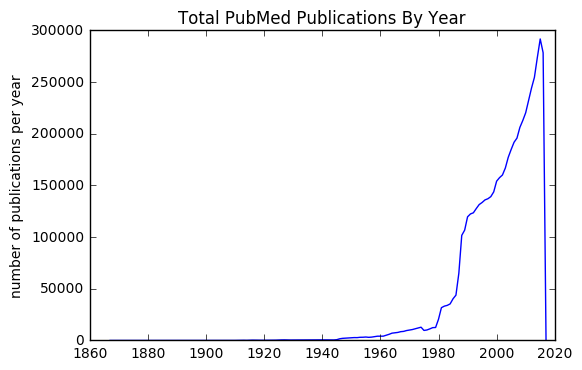

In [33]:
sum_PMID = mapAffil.groupby('year').PMID.nunique()
plt.plot(sum_PMID)
plt.title('Total PubMed Publications By Year')
plt.ylabel('number of publications per year')
plt.show()

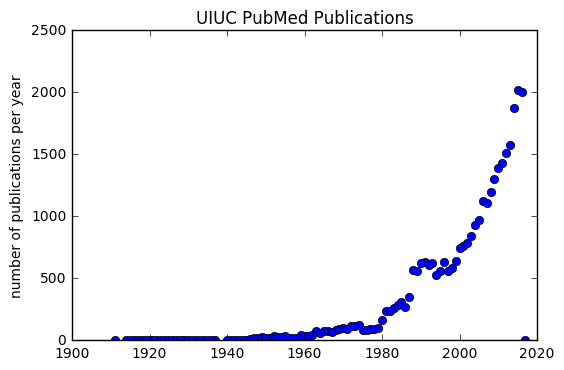

In [34]:
plt.plot(fips_yearly_publications[fips_yearly_publications['fips'] == 17019][['year']],
        fips_yearly_publications[fips_yearly_publications['fips'] == 17019][['yearly_fips_PMID_count']],
        'bo')
plt.title('UIUC PubMed Publications')
plt.ylabel('number of publications per year')
plt.show()

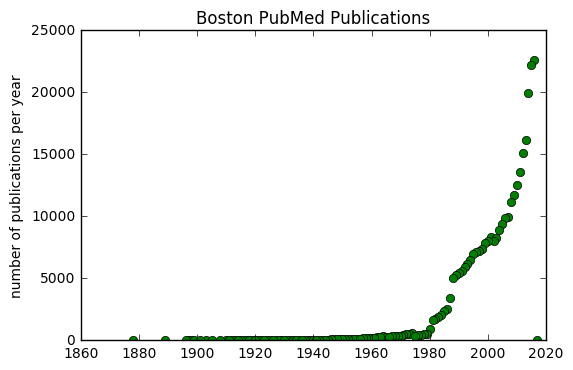

In [35]:
plt.plot(fips_yearly_publications[fips_yearly_publications['fips'] == 25025][['year']],
        fips_yearly_publications[fips_yearly_publications['fips'] == 25025][['yearly_fips_PMID_count']],
        'go')
# plt.plot(fips_yearly_publications[fips_yearly_publications['fips'] == 17019][['year']],
#         fips_yearly_publications[fips_yearly_publications['fips'] == 17019][['yearly_fips_PMID_count']],
#         'bo')
# plt.plot(fips_yearly_publications[fips_yearly_publications['city'] == 'Ann Arbor, MI, USA'][['year']],
#         fips_yearly_publications[fips_yearly_publications['city'] == 'Ann Arbor, MI, USA'][['yearly_fips_PMID_count']],
#         'g')
plt.title('Boston PubMed Publications')
plt.ylabel('number of publications per year')
plt.show()

In [37]:
fips_yearly_publications.head(10)

,index,year,city,state,country,lat,lon,fips,total_fips_PMID_count,yearly_fips_PMID_count
0,201,2016,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,22620
1,3,2015,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,22239
2,6046,2014,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,19960
3,2,2016,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061,294341,19745
4,110,2015,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061,294341,19209
5,5136,2014,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061,294341,17214
6,511486,2013,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,16168
7,831100,2012,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,15082
8,498667,2013,"New York, NY, USA",NY,USA,40.714,-74.007,36061,294341,13904
9,927932,2011,"Boston, MA, USA",MA,USA,42.359,-71.057,25025,319560,13549


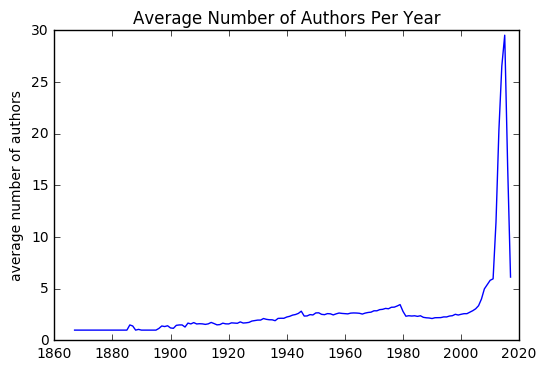

In [38]:
author_by_year = mapAffil.groupby('year').aggregate(np.mean)[['au_count_by_PMID']]
plt.plot(author_by_year)
plt.title('Average Number of Authors Per Year')
plt.ylabel('average number of authors')
plt.show()

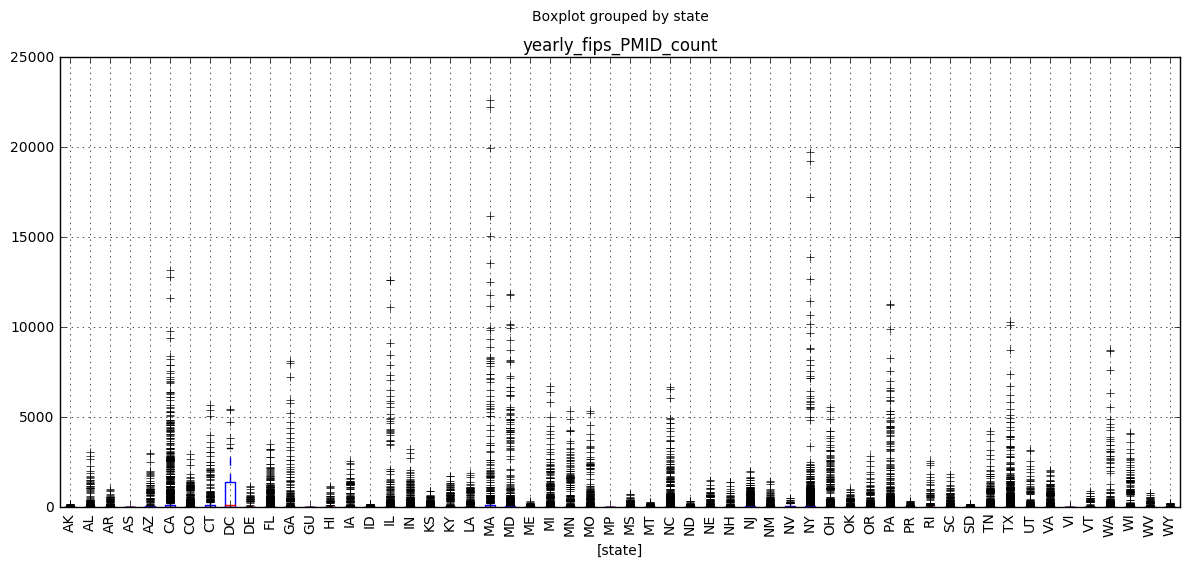

In [39]:
fips_yearly_publications.boxplot(column = ['yearly_fips_PMID_count'], rot='vertical', by =['state'], figsize=(14,6))
plt.show()

In [1]:
fips_yearly_publications.head(10).plot(kind='bar',x=['city', 'year'], y='yearly_fips_PMID_count')

NameError: name 'fips_yearly_publications' is not defined

In [ ]:
fips_yearly_publications.plot.bar()